## Step 01. Check the colab enviroment

In [1]:
'''import tensorflow as tf
print(tf.test.gpu_device_name())

from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())'''

!cat /proc/meminfo

import torch

print(torch.cuda.current_device())
print(torch.cuda.device(0))
print(torch.cuda.device_count())
print(torch.cuda.get_device_name(0))
print(torch.cuda.is_available())

# setting device on GPU if available, else CPU
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('Using device:', device)
print()

# additional info when using cuda
if device.type == 'cuda':
    print(torch.cuda.get_device_name(0))
    print('Memory Usage:')
    print('Allocated:', round(torch.cuda.memory_allocated(0)/1024**3,1), 'GB')
    print('Cached:   ', round(torch.cuda.memory_cached(0)/1024**3,1), 'GB')


MemTotal:       13297228 kB
MemFree:         2315820 kB
MemAvailable:   12270736 kB
Buffers:          429656 kB
Cached:          9429760 kB
SwapCached:            0 kB
Active:          1005840 kB
Inactive:        9470732 kB
Active(anon):       1444 kB
Inactive(anon):   549408 kB
Active(file):    1004396 kB
Inactive(file):  8921324 kB
Unevictable:           0 kB
Mlocked:               0 kB
SwapTotal:             0 kB
SwapFree:              0 kB
Dirty:              1228 kB
Writeback:             0 kB
AnonPages:        617312 kB
Mapped:           270516 kB
Shmem:              1188 kB
KReclaimable:     355120 kB
Slab:             397844 kB
SReclaimable:     355120 kB
SUnreclaim:        42724 kB
KernelStack:        5584 kB
PageTables:        11620 kB
NFS_Unstable:          0 kB
Bounce:                0 kB
WritebackTmp:          0 kB
CommitLimit:     6648612 kB
Committed_AS:    3335224 kB
VmallocTotal:   34359738367 kB
VmallocUsed:       46156 kB
VmallocChunk:          0 kB
Percpu:          

## Step 02. Mount drive

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


## Step 03. Download YOLOv4 PyTorch repo

In [3]:
# Commented out IPython magic to ensure Python compatibility.
# %cd /content/gdrive/My\ Drive
# %mkdir colab
%cd /content/gdrive/My\ Drive/colab
#!rm -rf pytorch-YOLOv4
#!git clone https://github.com/EdricJ/pytorch-YOLOv4
%cd /content/gdrive/My\ Drive/colab/pytorch-YOLOv4

/content/gdrive/My Drive/colab
/content/gdrive/My Drive/colab/pytorch-YOLOv4


## Step 04. Set up YOLOv4 PyTorch Environment

### install all library needed

In [4]:
!pip install -r requirements.txt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


###set up weights data

In [5]:
#import gdown

%cd /content/gdrive/My\ Drive/colab
!rm -rf weights
%mkdir weights

%cd /content/gdrive/My\ Drive/colab/weights

#*************** NOTE: If you use this method to download the weight dataset, the file you download will not be in the correct format and the training will not work **************
#*************** PLEASE click into Link, which you want to download weight dataset, download it to your computer and upload back to your current work ***************************** 

#url = "https://drive.google.com/file/d/1fcbR0bWzYfIEdLJPzOsn4R5mlvR6IQyA/view?fbclid=IwAR1f2ZdWo5a_P0wc-hjaQzv5dhT0B874z2z2hqx3TJtRiyeZkUlrnDr3okg"
#output = "yolov4.conv.137.pth"
#gdown.download(url, output, quiet=False)

# down yolov4.conv.137.pth
#!gdown https://drive.google.com/file/d/1fcbR0bWzYfIEdLJPzOsn4R5mlvR6IQyA/view?fbclid=IwAR1f2ZdWo5a_P0wc-hjaQzv5dhT0B874z2z2hqx3TJtRiyeZkUlrnDr3okg -O yolov4.conv.137.pth


/content/gdrive/My Drive/colab
/content/gdrive/My Drive/colab/weights
/usr/local/lib/python3.8/dist-packages/gdown/parse_url.py:35: UserWarning: You specified a Google Drive link that is not the correct link to download a file. You might want to try `--fuzzy` option or the following url: https://drive.google.com/uc?id=1fcbR0bWzYfIEdLJPzOsn4R5mlvR6IQyA
  warnings.warn(
Downloading...
From: https://drive.google.com/file/d/1fcbR0bWzYfIEdLJPzOsn4R5mlvR6IQyA/view?fbclid=IwAR1f2ZdWo5a_P0wc-hjaQzv5dhT0B874z2z2hqx3TJtRiyeZkUlrnDr3okg
To: /content/gdrive/My Drive/colab/weights/yolov4.conv.137.pth
71.0kB [00:00, 4.59MB/s]


### Step 04.1.1 Unzip dataset / manual in Google Drive

In [6]:
!rm -rf /content/gdrive/My\ Drive/colab/pytorch-YOLOv4/data_unzip

# 13 classes
!curl -L "https://public.roboflow.com/ds/Mf28POhvUD?key=sbYSk7Pm7b" > roboflow.zip; unzip roboflow.zip -d /content/gdrive/My\ Drive/colab/pytorch-YOLOv4/data_unzip; rm roboflow.zip


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   902  100   902    0     0    444      0  0:00:02  0:00:02 --:--:--   444
100 77.7M  100 77.7M    0     0   9.8M      0  0:00:07  0:00:07 --:--:-- 15.8M
Archive:  roboflow.zip
 extracting: /content/gdrive/My Drive/colab/pytorch-YOLOv4/data_unzip/README.dataset.txt  
 extracting: /content/gdrive/My Drive/colab/pytorch-YOLOv4/data_unzip/README.roboflow.txt  
   creating: /content/gdrive/My Drive/colab/pytorch-YOLOv4/data_unzip/test/
 extracting: /content/gdrive/My Drive/colab/pytorch-YOLOv4/data_unzip/test/0b47311f426ff926578c9d738d683e76_jpg.rf.0b55f43ac16aa65c889558d8ea757072.jpg  
 extracting: /content/gdrive/My Drive/colab/pytorch-YOLOv4/data_unzip/test/1c0060ef868bdc326ce5e6389cb6732f_jpg.rf.9ce88078ea356949f4ab7ad9cfdfc62d.jpg  
 extracting: /content/gdrive/My Drive/colab/pytorch-YOLOv4/data_unzip/test/2f6fb003bb89cd40132

### Step 04.1.2 Prepare dataset & weights (by unzip file)


In [7]:
%cd /content/gdrive/My\ Drive/colab/pytorch-YOLOv4

!rm -rf train
%mkdir train
%cp /content/gdrive/My\ Drive/colab/pytorch-YOLOv4/data_unzip/train/_annotations.txt train/train.txt
%cp /content/gdrive/My\ Drive/colab/pytorch-YOLOv4/data_unzip/train/_classes.txt train/_classes.txt
%cp /content/gdrive/My\ Drive/colab/pytorch-YOLOv4/data_unzip/train/_annotations.txt train.txt
%cp /content/gdrive/My\ Drive/colab/pytorch-YOLOv4/data_unzip/train/*.jpg train/
%cp /content/gdrive/My\ Drive/colab/pytorch-YOLOv4/data_unzip/valid/*.jpg train/

!rm -rf data
%mkdir data
%cp /content/gdrive/My\ Drive/colab/pytorch-YOLOv4/data_unzip/valid/_annotations.txt data/val.txt

!rm -rf test
%mkdir test
%cp /content/gdrive/My\ Drive/colab/pytorch-YOLOv4/data_unzip/test/_classes.txt test/_classes.txt
%cp /content/gdrive/My\ Drive/colab/pytorch-YOLOv4/data_unzip/test/*.jpg test/

/content/gdrive/My Drive/colab/pytorch-YOLOv4


### Step 04.2 Prepare dataset & weights (manual upload to Google Drive)


In [ ]:
# %cd /content/gdrive/My\ Drive/colab/pytorch-YOLOv4

# !rm -rf train
# %mkdir train
# %cp /content/gdrive/My\ Drive/colab/data/ChessPieces.v1-416x416auto-orient.yolov4pytorch/train/_annotations.txt train/train.txt
# %cp /content/gdrive/My\ Drive/colab/data/ChessPieces.v1-416x416auto-orient.yolov4pytorch/train/_classes.txt train/_classes.txt
# %cp /content/gdrive/My\ Drive/colab/data/ChessPieces.v1-416x416auto-orient.yolov4pytorch/train/_annotations.txt train.txt
# %cp /content/gdrive/My\ Drive/colab/data/ChessPieces.v1-416x416auto-orient.yolov4pytorch/train/*.jpg train/
# %cp /content/gdrive/My\ Drive/colab/data/ChessPieces.v1-416x416auto-orient.yolov4pytorch/valid/*.jpg train/

# !rm -rf data
# %mkdir data
# %cp /content/gdrive/My\ Drive/colab/data/ChessPieces.v1-416x416auto-orient.yolov4pytorch/valid/_annotations.txt data/val.txt

# !rm -rf test
# %mkdir test
# %cp /content/gdrive/My\ Drive/colab/data/ChessPieces.v1-416x416auto-orient.yolov4pytorch/test/_classes.txt test/_classes.txt
# %cp /content/gdrive/My\ Drive/colab/data/ChessPieces.v1-416x416auto-orient.yolov4pytorch/test/*.jpg test/

### Step 04.3 Check the number of classes

In [8]:
def file_len(fname):
  with open(fname) as f:
    for i, l in enumerate(f):
      pass
  return i + 1

num_classes = file_len('train/_classes.txt')
print(num_classes)

13


## Step 05. Training

### copy file to pytorch

In [9]:
# prepare pre-trained weights

# copy converted pre-trained weights
%cp /content/gdrive/My\ Drive/colab/weights/yolov4.conv.137.pth yolov4.conv.137.pth

### start training

In [10]:
# Commented out IPython magic to ensure Python compatibility.

# Commented out IPython magic to ensure Python compatibility.
#start training
# -b batch size (you should keep this low (2-4) for training to work properly)
# -s number of subdivisions in the batch, this was more relevant for the darknet framework
# -l learning rate
# -g direct training to the GPU device
#pretrained invoke the pretrained weights that we downloaded above
# classes - number of classes
#dir - where the training data is
#epoch - how long to train for

%cd /content/gdrive/My\ Drive/colab/pytorch-YOLOv4
!python train.py -b 2 -s 1 -l 0.001 -g 0 -pretrained ./yolov4.conv.137.pth -classes {num_classes} -dir ./train -epochs 50

# continue training from the checkpoints
#Yolov4_epoch*.pth / * is the number between 1 - 50

#!python train.py -b 2 -s 1 -l 0.001 -g 0 -pretrained ./checkpoints/Yolov4_epoch1.pth -classes {num_classes} -dir ./train -epochs 50


/content/gdrive/My Drive/colab/pytorch-YOLOv4
log file path:log/log_2022-12-08_12-35-05.txt
2022-12-08 12:35:05,421 train.py[line:435] INFO: Using device cuda
2022-12-08 12:35:09,031 train.py[line:268] INFO: Starting training:
        Epochs:          50
        Batch size:      2
        Subdivisions:    1
        Learning rate:   0.001
        Training size:   202
        Validation size: 58
        Checkpoints:     True
        Device:          cuda
        Images size:     608
        Optimizer:       adam
        Dataset classes: 13
        Train label path:train.txt
        Pretrained:
    
Epoch 1/50:   0%|        | 0/202 [00:00<?, ?img/s]/usr/local/lib/python3.8/dist-packages/torch/nn/_reduction.py:43: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
Epoch 1/50:  19%|▏| 38/202 [00:24<01:04,  2.55img//usr/local/lib/python3.8/dist-packages/torch/optim/lr_scheduler.py:224: UserWarning: To get the

## Step 06. Test the results

/content/gdrive/My Drive/colab/pytorch-YOLOv4
Yolov4_epoch10.pth  Yolov4_epoch22.pth	Yolov4_epoch34.pth  Yolov4_epoch46.pth
Yolov4_epoch11.pth  Yolov4_epoch23.pth	Yolov4_epoch35.pth  Yolov4_epoch47.pth
Yolov4_epoch12.pth  Yolov4_epoch24.pth	Yolov4_epoch36.pth  Yolov4_epoch48.pth
Yolov4_epoch13.pth  Yolov4_epoch25.pth	Yolov4_epoch37.pth  Yolov4_epoch49.pth
Yolov4_epoch14.pth  Yolov4_epoch26.pth	Yolov4_epoch38.pth  Yolov4_epoch4.pth
Yolov4_epoch15.pth  Yolov4_epoch27.pth	Yolov4_epoch39.pth  Yolov4_epoch50.pth
Yolov4_epoch16.pth  Yolov4_epoch28.pth	Yolov4_epoch3.pth   Yolov4_epoch5.pth
Yolov4_epoch17.pth  Yolov4_epoch29.pth	Yolov4_epoch40.pth  Yolov4_epoch6.pth
Yolov4_epoch18.pth  Yolov4_epoch2.pth	Yolov4_epoch41.pth  Yolov4_epoch7.pth
Yolov4_epoch19.pth  Yolov4_epoch30.pth	Yolov4_epoch42.pth  Yolov4_epoch8.pth
Yolov4_epoch1.pth   Yolov4_epoch31.pth	Yolov4_epoch43.pth  Yolov4_epoch9.pth
Yolov4_epoch20.pth  Yolov4_epoch32.pth	Yolov4_epoch44.pth
Yolov4_epoch21.pth  Yolov4_epoch33.pth	Yolov4

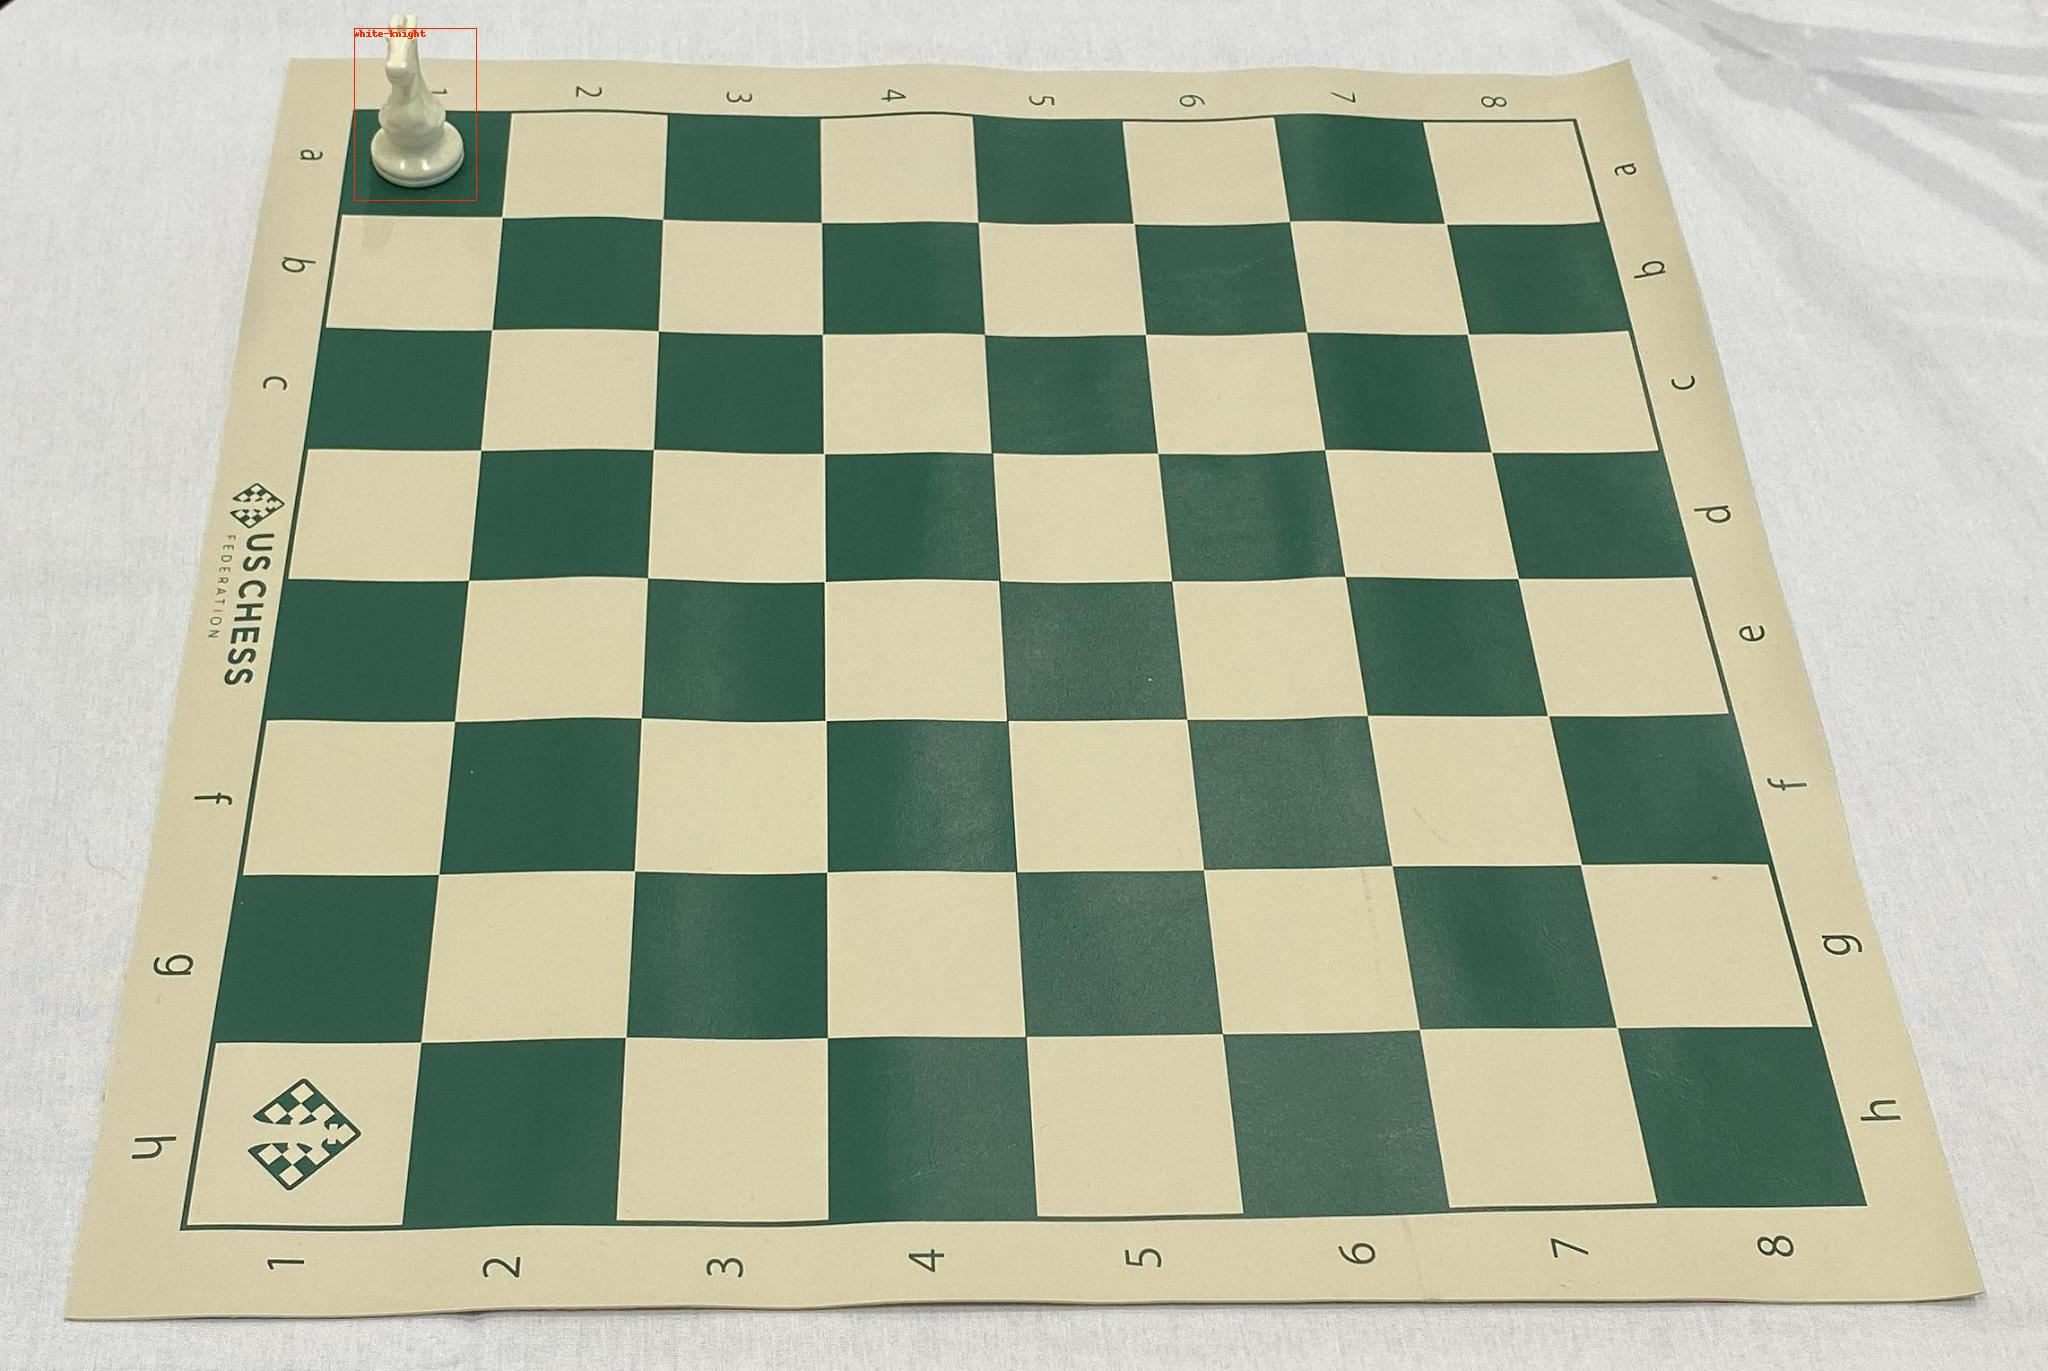

In [12]:
# Check the trained weights

%cd /content/gdrive/My\ Drive/colab/pytorch-YOLOv4

!ls checkpoints

# Choose random test image

import os
test_images = [f for f in os.listdir('test') if f.endswith('.jpg')]
import random
img_path = "test/" + random.choice(test_images);

print(img_path)

# Run test for a random image using a chosen checkpoints and visualization the result
#Yolov4_epoch*.pth / * is the number between 1 - 50

!python models.py {num_classes} checkpoints/Yolov4_epoch46.pth {img_path} test/_classes.txt

from IPython.display import Image
Image('predictions.jpg')